In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

#pd.set_option('display.max_rows', None)
pd.reset_option("display.min_rows")
#-----------------------------------------------------------
#Lê os dados do arquivo CSV.
#-----------------------------------------------------------
data = pd.read_csv('Inteligencia_Artificial/Trabalho de Conclusão de Curso/Base de Dados/2021/BBDC4_30m_2021.csv') 
data.head()
#print(df)
#df.info()

,time,open,high,low,close,Volume,Volume MA
0,2021-01-04T10:00:00-03:00,21.814317,21.814317,21.505287,21.521135,1880012,1384668.55
1,2021-01-04T10:30:00-03:00,21.529059,21.576602,21.441896,21.497363,1532703,1368010.00
2,2021-01-04T11:00:00-03:00,21.505287,21.552830,21.473592,21.481516,877715,1345874.15
3,2021-01-04T11:30:00-03:00,21.497363,21.521135,21.132867,21.188334,5465393,1548509.50
4,2021-01-04T12:00:00-03:00,21.188334,21.227953,21.085324,21.124943,4150374,1694177.35


In [2]:
data = data.set_index('time') #Mudando o index para o date
#print(df.index)

#-----------------------------------------------------------
#Sabe se mudou o index, porque com o df.info, ele não aparece como um dos parametros
#-----------------------------------------------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3938 entries, 2021-01-04T10:00:00-03:00 to 2021-12-30T17:30:00-03:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3938 non-null   float64
 1   high       3938 non-null   float64
 2   low        3938 non-null   float64
 3   close      3938 non-null   float64
 4   Volume     3938 non-null   int64  
 5   Volume MA  3938 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 215.4+ KB


In [3]:
#-----------------------------------------------------------
#Escolhe a coluna de série temporal única de interesse.
#-----------------------------------------------------------
symbol = "close"

data = pd.DataFrame(data[symbol])
data.head()

,close
time,
2021-01-04T10:00:00-03:00,21.521135
2021-01-04T10:30:00-03:00,21.497363
2021-01-04T11:00:00-03:00,21.481516
2021-01-04T11:30:00-03:00,21.188334
2021-01-04T12:00:00-03:00,21.124943


In [4]:
#-----------------------------------------------------------
#Renomeia a única coluna para price
#-----------------------------------------------------------

data.rename(columns={symbol: 'price'}, inplace=True)

data.head()

,price
time,
2021-01-04T10:00:00-03:00,21.521135
2021-01-04T10:30:00-03:00,21.497363
2021-01-04T11:00:00-03:00,21.481516
2021-01-04T11:30:00-03:00,21.188334
2021-01-04T12:00:00-03:00,21.124943


In [5]:
#-----------------------------------------------------------
# Calcula o log de retorno e define a direção como uma coluna binária.
#-----------------------------------------------------------

#Log Retorno
data['return'] = np.log(data['price']/data['price'].shift(1))


#Coluna binária
data['direction'] = np.where(data['return'] > 0, 1, 0)
#data.head()

display(data)

,price,return,direction
time,,,
2021-01-04T10:00:00-03:00,21.521135,NaN,0
2021-01-04T10:30:00-03:00,21.497363,-0.001105,0
2021-01-04T11:00:00-03:00,21.481516,-0.000737,0
2021-01-04T11:30:00-03:00,21.188334,-0.013742,0
2021-01-04T12:00:00-03:00,21.124943,-0.002996,0
...,...,...,...
2021-12-30T15:30:00-03:00,17.476119,0.002594,1
2021-12-30T16:00:00-03:00,17.430844,-0.002594,0
2021-12-30T16:30:00-03:00,17.430844,0.000000,0


In [6]:
#Para a previsão do mercado de ações, é crucial encontrar dependências de tempo bem definidas
lags = 4

cols = []
#-----------------------------------------------------------
# Cria os Lagged Data
#-----------------------------------------------------------
for lag in range(1, lags + 1):
     col = f'lag_{lag}'
#-----------------------------------------------------------
# Cria novas colunas DataFrame com os retornos de log deslocados pelo respectivo número de atrasos
#-----------------------------------------------------------
     data[col] = data['return'].shift(lag)
     cols.append(col)
#-----------------------------------------------------------
# Exclui as linhas que contêm valores NaN.
#-----------------------------------------------------------
data.dropna(inplace=True)
data[col]

time
2021-01-04T12:30:00-03:00   -0.001105
2021-01-04T13:00:00-03:00   -0.000737
2021-01-04T13:30:00-03:00   -0.013742
2021-01-04T14:00:00-03:00   -0.002996
2021-01-04T14:30:00-03:00   -0.007530
                               ...   
2021-12-30T15:30:00-03:00    0.002612
2021-12-30T16:00:00-03:00   -0.000522
2021-12-30T16:30:00-03:00   -0.001567
2021-12-30T17:00:00-03:00    0.006253
2021-12-30T17:30:00-03:00    0.002594
Name: lag_4, Length: 3933, dtype: float64

In [7]:
#-----------------------------------------------------------
# Imprime as cinco linhas finais indicando os “padrões” emergentes nas quatro colunas de recursos
#-----------------------------------------------------------

#data.round(4).tail() 
display(data.index)

Index(['2021-01-04T12:30:00-03:00', '2021-01-04T13:00:00-03:00',
       '2021-01-04T13:30:00-03:00', '2021-01-04T14:00:00-03:00',
       '2021-01-04T14:30:00-03:00', '2021-01-04T15:00:00-03:00',
       '2021-01-04T15:30:00-03:00', '2021-01-04T16:00:00-03:00',
       '2021-01-04T16:30:00-03:00', '2021-01-04T17:00:00-03:00',
       ...
       '2021-12-30T13:00:00-03:00', '2021-12-30T13:30:00-03:00',
       '2021-12-30T14:00:00-03:00', '2021-12-30T14:30:00-03:00',
       '2021-12-30T15:00:00-03:00', '2021-12-30T15:30:00-03:00',
       '2021-12-30T16:00:00-03:00', '2021-12-30T16:30:00-03:00',
       '2021-12-30T17:00:00-03:00', '2021-12-30T17:30:00-03:00'],
      dtype='object', name='time', length=3933)

In [8]:
#-----------------------------------------------------------
# Define a data limite entre os dados de treinamento e teste.
#-----------------------------------------------------------
data.index = range(len(data['direction']))
cutoff = int(len(data['direction']) * 0.80)
print(cutoff)


display(data)

3146


,price,return,direction,lag_1,lag_2,lag_3,lag_4
0,20.966466,-0.007530,0,-0.002996,-0.013742,-0.000737,-0.001105
1,20.926847,-0.001891,0,-0.007530,-0.002996,-0.013742,-0.000737
2,20.926847,0.000000,0,-0.001891,-0.007530,-0.002996,-0.013742
3,20.879304,-0.002274,0,0.000000,-0.001891,-0.007530,-0.002996
4,21.006085,0.006054,1,-0.002274,0.000000,-0.001891,-0.007530
...,...,...,...,...,...,...,...
3928,17.476119,0.002594,1,0.006253,-0.001567,-0.000522,0.002612
3929,17.430844,-0.002594,0,0.002594,0.006253,-0.001567,-0.000522
3930,17.430844,0.000000,0,-0.002594,0.002594,0.006253,-0.001567
3931,17.412734,-0.001040,0,0.000000,-0.002594,0.002594,0.006253


In [9]:
"""                      TREINAMENTO                      """
#-----------------------------------------------------------
# Define os conjuntos de dados de treinamento.
#-----------------------------------------------------------
training_data = data[data.index < cutoff].copy()


#-----------------------------------------------------------
# Normalizes the features data by Gaussian normalization. (z-score)
#-----------------------------------------------------------
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu) / std
#print(training_data_[cols])



"""-------------------Dados de Entrada--------------------"""

#-----------------------------------------------------------
# Pega os dados de 'Lag' de treinamentos e coloca na variavel X_train
#-----------------------------------------------------------
X_train = training_data[cols].values
X_train_ = training_data_[cols].values


#-----------------------------------------------------------
# Redefine os dados de treinamento para serem 3D (TRAINING_DAYS, TimeSteps, FEATURES)
#-----------------------------------------------------------
X_train = X_train.reshape(len(X_train),lags,1)
X_train_ = X_train_.reshape(len(X_train_),lags,1)


"""-------------------Dados de Saida----------------------"""

#-----------------------------------------------------------
# Pega os dados de direção(0 e 1) de treinamento e coloca na variavel Y_train
#-----------------------------------------------------------
Y_train = training_data['direction'].values

X_train_.shape, Y_train.shape
X_train_

array([[[-0.59697302],
        [-2.76039067],
        [-0.14055013],
        [-0.21427121]],

       [[-1.51116221],
        [-0.59585174],
        [-2.7603883 ],
        [-0.14017061]],

       [[-0.37419783],
        [-1.50911805],
        [-0.59560188],
        [-2.76045265]],

       ...,

       [[ 1.05413795],
        [-0.94334881],
        [ 0.86384144],
        [-0.84756517]],

       [[ 0.85975362],
        [ 1.05359244],
        [-0.94313869],
        [ 0.86439113]],

       [[-1.13040304],
        [ 0.85940434],
        [ 1.05403088],
        [-0.94289515]]])

In [10]:
#-----------------------------------------------------------
# Quantos 0 e quantos 1 possuem no meu dado de Treino? 
#-----------------------------------------------------------
count1 = 0
count0 = 0
for i in Y_train:
    if i == 1:
        count1 += 1
    elif i == 0:
        count0 += 1
print("TREINAMENTO ")
print("Quantos 1 tem na saida? ",count1)
print("Quantos 0 tem na saida? ",count0)
print("Total: ",len(Y_train))

TREINAMENTO 
Quantos 1 tem na saida?  1444
Quantos 0 tem na saida?  1702
Total:  3146


In [11]:
"""                           TESTE                     """
#-----------------------------------------------------------
# Define os conjuntos de dados de teste.
#-----------------------------------------------------------
test_data = data[data.index >= cutoff].copy()
#print(test_data[cols])

#-----------------------------------------------------------
# Normalizes the features data by Gaussian normalization.
#-----------------------------------------------------------
test_data_ = (test_data - mu) / std
#print(test_data_[cols])

"""-------------------Dados de Entrada--------------------"""

#-----------------------------------------------------------
# Pega os dados de 'Lag' de teste e coloca na variavel X_test
#-----------------------------------------------------------
X_test = test_data[cols].values
X_test_ = test_data_[cols].values

#-----------------------------------------------------------
# Redefine os dados de 'Lag' teste para serem 3D (TRAINING_DAYS, TimeSteps, FEATURES)
#-----------------------------------------------------------
X_test = X_test.reshape(len(X_test),lags, 1)
X_test_ = X_test_.reshape(len(X_test_),lags, 1)


"""-------------------Dados de Saida----------------------"""

#-----------------------------------------------------------
# Pega os dados de direção(0 e 1) de teste e coloca na variavel Y_teste
#-----------------------------------------------------------
Y_test = test_data['direction'].values
print(X_test_.shape, Y_test.shape)
X_test_

(787, 4, 1) (787,)


array([[[-1.04125593],
        [-1.12874325],
        [ 0.85982058],
        [ 1.0546128 ]],

       [[-0.66286855],
        [-1.03968614],
        [-1.12855433],
        [ 0.86036959]],

       [[ 1.53544508],
        [-0.66168074],
        [-1.03948704],
        [-1.1283422 ]],

       ...,

       [[-0.5158692 ],
        [ 0.53020865],
        [ 1.26774488],
        [-0.30731683]],

       [[ 0.00717804],
        [-0.51482979],
        [ 0.53058725],
        [ 1.268363  ]],

       [[-0.20242136],
        [ 0.00768943],
        [-0.51457067],
        [ 0.53108048]]])

In [12]:
#-----------------------------------------------------------
# Quantos 0 e quantos 1 possuem no meu dado de Teste? 
#-----------------------------------------------------------
count1 = 0
count0 = 0
for i in Y_test:
    if i == 1:
        count1 += 1
    elif i == 0:
        count0 += 1
        
print("TESTE ")
print("Quantos 1 tem na saida? ",count1)
print("Quantos 0 tem na saida? ",count0)
print("Total: ",len(Y_test))

TESTE 
Quantos 1 tem na saida?  353
Quantos 0 tem na saida?  434
Total:  787


In [13]:
#-----------------------------------------------------------
# Importa o pacote TensorFlow.
#-----------------------------------------------------------
import tensorflow as tf
#-----------------------------------------------------------
# Importa o objeto de modelo necessário do Keras
#-----------------------------------------------------------
from keras.models import Sequential
#-----------------------------------------------------------
# Importa o objeto de camada relevante do Keras
#-----------------------------------------------------------
from keras.layers import Dense, Flatten,Dropout, LSTM, Embedding, Input

# Importa Layer weight regularizers
# https://keras.io/api/layers/regularizers/
#-----------------------------------------------------------
from tensorflow import keras

from keras import layers

from tensorflow.keras.optimizers import Adam, RMSprop
#-----------------------------------------------------------
# Otimizador https://keras.io/api/optimizers/
#-----------------------------------------------------------
optimizer = Adam(learning_rate=0.001)

In [14]:
#-----------------------------------------------------------
# Um modelo Sequencial é instanciado.
#-----------------------------------------------------------
model=Sequential()
model.add(LSTM(5 ,activation = 'relu',input_shape=(lags,1)))
model.add(Dense(1, activation='sigmoid'))

In [15]:
#-----------------------------------------------------------
# Compila o objeto de modelo Sequencial para classificação.
#-----------------------------------------------------------
model.compile(optimizer= optimizer,
 loss='binary_crossentropy',
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://keras.io/api/metrics/
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
#-----------------------------------------------------------
# Ajusta o modelo ao conjunto de dados de treinamento.
#-----------------------------------------------------------
model.fit(X_train_, # Lags
    Y_train, # 0 e 1
   epochs=10, batch_size=40, verbose=True,validation_data=(X_test_, Y_test), #Gera conjunto de dados de validação aleatórios (https://curiousily.com/posts/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python/) # https://github.com/keras-team/keras/issues/597
          shuffle=False)

Epoch 1/10
79/79 [==============================] - 2s 7ms/step - loss: 0.6947 - accuracy: 0.5124 - val_loss: 0.6929 - val_accuracy: 0.5299
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5413 - val_loss: 0.6901 - val_accuracy: 0.5426
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5410 - val_loss: 0.6893 - val_accuracy: 0.5451
Epoch 4/10
79/79 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5397 - val_loss: 0.6889 - val_accuracy: 0.5464
Epoch 5/10
79/79 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.5407 - val_loss: 0.6887 - val_accuracy: 0.5489
Epoch 6/10
79/79 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5404 - val_loss: 0.6886 - val_accuracy: 0.5489
Epoch 7/10
79/79 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5407 - val_loss: 0.6885 - val_accuracy: 0.5489
Epoch 8/10
79/79 [==

In [17]:
res = pd.DataFrame(model.history.history)
model.history.history
res.head()

,loss,accuracy,val_loss,val_accuracy
0,0.694726,0.512397,0.692851,0.529860
1,0.691383,0.541322,0.690138,0.542567
2,0.690485,0.541004,0.689265,0.545108
3,0.690238,0.539733,0.688885,0.546379
4,0.690128,0.540687,0.688683,0.548920


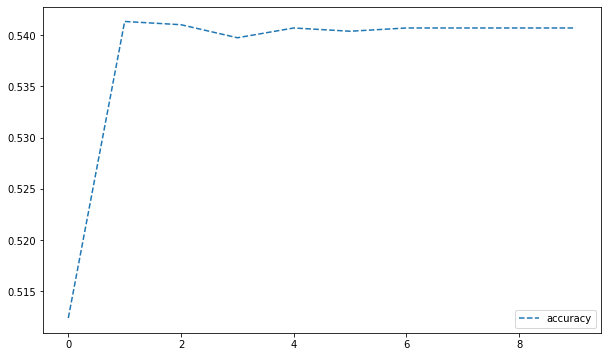

In [18]:

res[['accuracy']].plot(figsize=(10, 6), style='--');

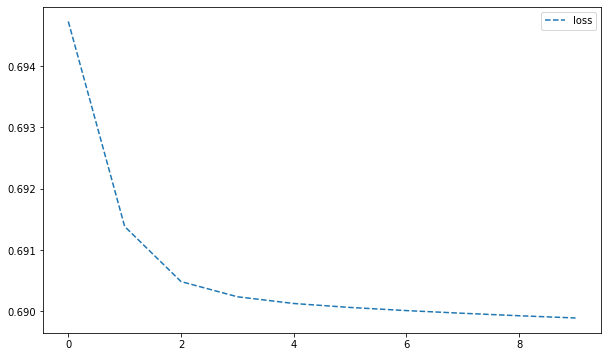

In [19]:
res[['loss']].plot(figsize=(10, 6), style='--');

In [20]:
# Final evaluation of the model
scores_test = model.evaluate(X_test_, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores_test[1]*100))
scores_train = model.evaluate(X_train_, Y_train, verbose=0)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
# Média e Desvio padrão. 
#Box plots

Test Accuracy: 55.02%
Train Accuracy: 54.13%


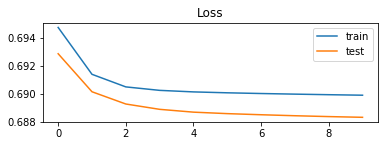

In [21]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(res['loss'], label='train')
pyplot.plot(res['val_loss'], label='test')
pyplot.legend()

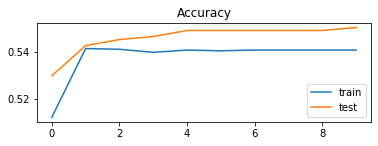

In [22]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(res['accuracy'], label='train')
pyplot.plot(res['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()